<a href="https://colab.research.google.com/github/kakranhimanshu/fake_news/blob/main/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                               title  \
0  North Carolina Democrats win extension of vote...   
1   This Kansas Republican Thought Touting ‘Profo...   
2  REPORT: TRUMP Set Brilliant “Fake News” Trap F...   
3  SINS OF SOCIALISM…Doctors Pumping Air Into Inf...   
4   Trump Throws An EPIC, Brain-Melting Tantrum A...   

                                                text          subject  \
0  WINSTON-SALEM, N.C. (Reuters) - A state judge ...     politicsNews   
1  Republicans have a knack for making bad choice...             News   
2  According to the Associated Press on Friday, P...  Government News   
3  Only the strongest will survive in the dog-eat...  Government News   
4  Russia   you know, that country whose leader o...             News   

                date  label  
0  October 14, 2016       1  
1   October 20, 2016      0  
2       Feb 18, 2017      0  
3       May 16, 2016      0  
4   January 11, 2017      0  
label
0    23481
1    21417
Name: count, dty

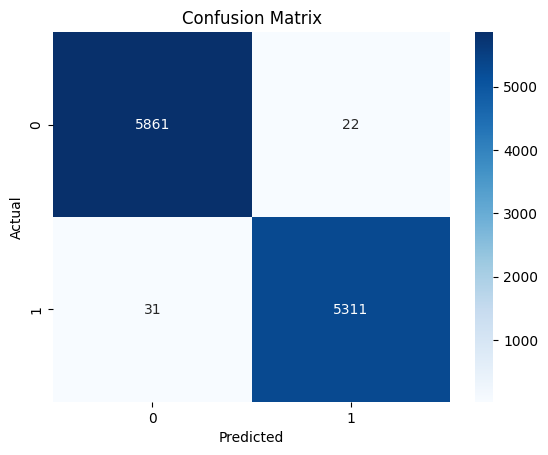


Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5883
           1       1.00      0.99      1.00      5342

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

Fake News 📰


In [ ]:
# ----------------------------------------
# Step 1: Import Libraries
# ----------------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ----------------------------------------
# Step 2: Load the Dataset
# ----------------------------------------

# Load True and Fake datasets
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')

# Add labels
true['label'] = 1  # Real news
fake['label'] = 0  # Fake news

# Merge datasets
data = pd.concat([true, fake], axis=0)

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

# ----------------------------------------
# Step 3: Explore the Data
# ----------------------------------------

print(data.head())
print(data['label'].value_counts())

# ----------------------------------------
# Step 4: Text Cleaning (optional but good practice)
# ----------------------------------------

def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub('\[.*?\]', '', text)  # Remove text in brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub('<.*?>+', '', text)  # Remove HTML tags
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub('\n', '', text)  # Remove line breaks
    text = re.sub('\w*\d\w*', '', text)  # Remove words containing numbers
    return text

data['text'] = data['title'] + " " + data['text']  # Combine title and body
data['text'] = data['text'].apply(clean_text)

# ----------------------------------------
# Step 5: Split the Dataset
# ----------------------------------------

X = data['text']
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# ----------------------------------------
# Step 6: Text Vectorization
# ----------------------------------------

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

# ----------------------------------------
# Step 7: Model Training
# ----------------------------------------

model = PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train, y_train)

# ----------------------------------------
# Step 8: Model Evaluation
# ----------------------------------------

y_pred = model.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {round(score*100, 2)}%")

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# ----------------------------------------
# Step 9: Test Your Model (Optional)
# ----------------------------------------

def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    if prediction[0] == 1:
        return "Real News 📰"
    else:
        return "Fake News 📰"

# Example
sample_text = "himanshu says he won the 2020 election by a landslide."
print(predict_news(sample_text))

In [ ]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    if prediction[0] == 1:
        return "Real News 📰"
    else:
        return "Fake News 📰"

# Example
sample_text = "himanshu says he won the 2020 election by a landslide."
print(predict_news(sample_text))

Fake News 📰
